In [1]:
import matplotlib as mpl

# 提升 Notebook 与存图分辨率
mpl.rcParams['figure.dpi'] = 180
mpl.rcParams['savefig.dpi'] = 300
# 自动紧凑布局，减少标签被裁剪
mpl.rcParams['figure.autolayout'] = True

# 统一一些更清晰的排版参数
mpl.rcParams['font.family'] = 'DejaVu Sans'
mpl.rcParams['axes.titlesize'] = 10
mpl.rcParams['axes.labelsize'] = 9
mpl.rcParams['xtick.labelsize'] = 8
mpl.rcParams['ytick.labelsize'] = 8
mpl.rcParams['lines.linewidth'] = 1.5
mpl.rcParams['legend.frameon'] = True
mpl.rcParams['legend.fontsize'] = 8



In [2]:
# %pip install matplotlib
# %pip install numpy
# %pip install seaborn

import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np


In [3]:
def read_accuracy_from_txt(file_path):
    accuracy_list = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            line = line.strip()
            # 跳过空行和注释行
            if not line or line.startswith('#'):
                continue
            
            try:
                data_tuple = eval(line)
                if isinstance(data_tuple, tuple) and len(data_tuple) > 0:
                    data_dict = data_tuple[0]  # 取元组的第一个元素
                    if isinstance(data_dict, dict) and 'accuracy' in data_dict:
                        accuracy_list.append(data_dict['accuracy'])
            except:
                continue
    
    return accuracy_list

def smooth_data(data, window_size=5):
    smoothed_acc = []
    
    for i in range(len(data)):
        start = max(0, i - window_size // 2)
        end = min(len(data), i + window_size // 2 + 1)
        smoothed_acc.append(np.mean(data[start:end]))
    
    return smoothed_acc

In [4]:
# iid_1 = read_accuracy_from_txt('/root/learning-tangle/prints/mnist/mnist-fedavg.txt')
iid_2 = read_accuracy_from_txt('/root/learning-tangle/prints/mnist/mnist-fedavg.txt')
iid_3 = read_accuracy_from_txt('/root/learning-tangle/prints/mnist/mnist-bafl.txt')
iid_4 = read_accuracy_from_txt('/root/learning-tangle/prints/mnist/mnist-tangle.txt')
iid_5 = read_accuracy_from_txt('/root/learning-tangle/prints/mnist/mnist-tanglecta.txt')

# iid_1 = read_accuracy_from_txt('/root/learning-tangle/prints/mnist/niid-mnist-fedavg.txt')
niid_2 = read_accuracy_from_txt('/root/learning-tangle/prints/mnist/niid-mnist-fedavg.txt')
niid_3 = read_accuracy_from_txt('/root/learning-tangle/prints/mnist/niid-mnist-bafl.txt')
niid_4 = read_accuracy_from_txt('/root/learning-tangle/prints/mnist/niid-mnist-tangle.txt')
niid_5 = read_accuracy_from_txt('/root/learning-tangle/prints/mnist/niid-mnist-tanglecta.txt')

window_size=10
# iid_1_smooth = smooth_data(iid_1, window_size)
iid_2_smooth = smooth_data(iid_2, window_size)
iid_3_smooth = smooth_data(iid_3, window_size)
iid_4_smooth = smooth_data(iid_4, window_size)
iid_5_smooth = smooth_data(iid_5, window_size)

window_size=20
# niid_1_smooth = smooth_data(niid_1, window_size)
niid_2_smooth = smooth_data(niid_2, window_size)
niid_3_smooth = smooth_data(niid_3, window_size)
niid_4_smooth = smooth_data(niid_4, window_size)
niid_5_smooth = smooth_data(niid_5, window_size)


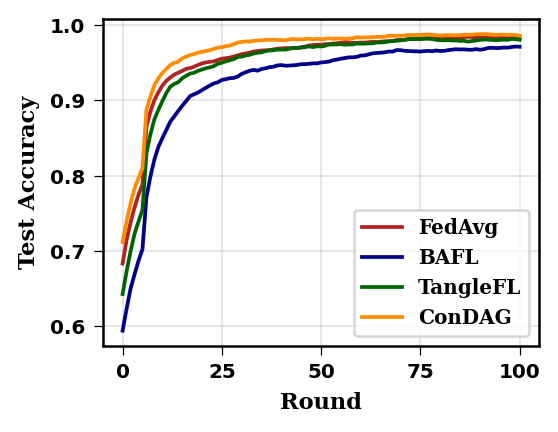

In [5]:
rounds = list(range(0, 101, 1))
plt.rcParams['font.family'] = 'serif'
plt.figure(figsize=(3.2,2.5))

plt.xticks(np.arange(0, 101, 25))
# plt.yticks(np.arange(0.4, 1, 0.1))
plt.grid(True, alpha=0.3)

ax = plt.gca()
# 加粗四个边框
for spine in ax.spines.values():
    spine.set_linewidth(1)
# 加粗刻度线
plt.tick_params(axis='both', width=0.5, labelsize=8)
# 加粗刻度数字
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontweight('semibold')
    label.set_fontfamily('DejaVu Sans')

colors = ['saddlebrown', 'firebrick', 'darkblue', 'darkgreen', 'darkorange']
# plt.plot(rounds, iid_1_smooth, label='FedAvg', color=colors[0])
plt.plot(rounds, iid_2_smooth, label='FedAvg', color=colors[1])
plt.plot(rounds, iid_3_smooth, label='BAFL', color=colors[2])
plt.plot(rounds, iid_4_smooth, label='TangleFL', color=colors[3])
plt.plot(rounds, iid_5_smooth, label='ConDAG', color=colors[4])

plt.legend(loc='lower right', frameon=True, fancybox=True)
for text in plt.gca().get_legend().get_texts():
    text.set_fontweight('bold')  # 或 'semibold'/'medium'

plt.xlabel('Round', weight='bold')
plt.ylabel('Test Accuracy', weight='bold')

plt.show()

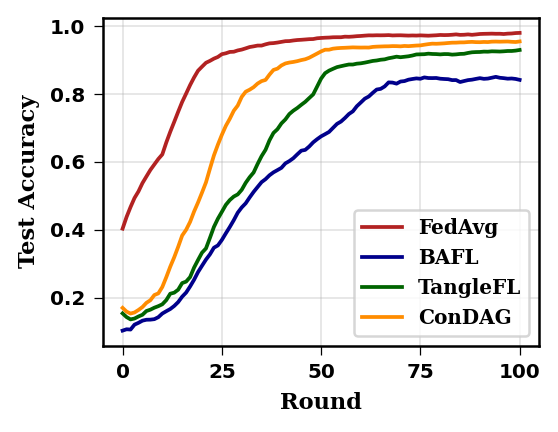

In [6]:
rounds = list(range(0, 101, 1))
plt.rcParams['font.family'] = 'serif'
plt.figure(figsize=(3.2,2.5))

plt.xticks(np.arange(0, 101, 25))
# plt.yticks(np.arange(0.4, 1, 0.1))
plt.grid(True, alpha=0.3)

ax = plt.gca()
# 加粗四个边框
for spine in ax.spines.values():
    spine.set_linewidth(1)
# 加粗刻度线
plt.tick_params(axis='both', width=0.5, labelsize=8)
# 加粗刻度数字
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontweight('semibold')
    label.set_fontfamily('DejaVu Sans')

colors = ['saddlebrown', 'firebrick', 'darkblue', 'darkgreen', 'darkorange']
# plt.plot(rounds, niid_1_smooth, label='FedAvg', color=colors[0])
plt.plot(rounds, niid_2_smooth, label='FedAvg', color=colors[1])
plt.plot(rounds, niid_3_smooth, label='BAFL', color=colors[2])
plt.plot(rounds, niid_4_smooth, label='TangleFL', color=colors[3])
plt.plot(rounds, niid_5_smooth, label='ConDAG', color=colors[4])

plt.legend(loc='lower right', frameon=True, fancybox=True)
for text in plt.gca().get_legend().get_texts():
    text.set_fontweight('bold')  # 或 'semibold'/'medium'

plt.xlabel('Round', weight='bold')
plt.ylabel('Test Accuracy', weight='bold')

plt.show()